# Session 14: Gradient Descent for Multivariate Linear Regression

In this session, we will:
1. Learn the basics of **NumPy** for numerical computing
2. Understand **gradient descent** optimization
3. Implement **multivariate linear regression** from scratch

---
## Part 1: Introduction to NumPy

NumPy is the fundamental package for numerical computing in Python. It provides:
- N-dimensional arrays (`ndarray`)
- Broadcasting for element-wise operations
- Linear algebra operations
- Mathematical functions optimized for arrays

In [1]:
import numpy as np

alias

### 1.1 Creating Arrays

In [2]:
# From Python lists
arr1 = np.array([-1, 2, 3, 4, 5], dtype=np.int8)
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}")
print(f"Dtype: {arr1.dtype}")

1D array: [-1  2  3  4  5]
Shape: (5,)
Dtype: int8


In [4]:
# 2D array (matrix)
arr2 = np.array([[1, 2, 3], 
                 [4, 5, 6]])
print(f"2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")  # (rows, columns)

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [5]:
# Common array creation functions
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
random = np.random.randn(3, 3) # 3x3 matrix of random values (normal distribution)
arange = np.arange(0, 10, 2)   # [0, 2, 4, 6, 8]
linspace = np.linspace(0, 1, 5) # 5 evenly spaced values from 0 to 1

print(f"zeros:\n{zeros}\n")
print(f"ones:\n{ones}\n")
print(f"random:\n{random}\n")
print(f"arange: {arange}")
print(f"linspace: {linspace}")

zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
[[1. 1. 1.]
 [1. 1. 1.]]

random:
[[-0.93384328 -0.52231596 -0.99932947]
 [-0.74006074  0.42977971 -0.5923356 ]
 [ 0.53429826  1.70091506  0.60832175]]

arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Array Operations and Broadcasting

NumPy operations are **element-wise** by default. Broadcasting allows operations between arrays of different shapes.

In [6]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"a + b = {a + b}")      # Element-wise addition
print(f"a * b = {a * b}")      # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")    # Element-wise power
print(f"a * 10 = {a * 10}")    # Broadcasting: scalar applied to all elements

a + b = [5 7 9]
a * b = [ 4 10 18]
a ** 2 = [1 4 9]
a * 10 = [10 20 30]


In [7]:
# Broadcasting with 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
row_vector = np.array([10, 20, 30])

"""
[[10, 20, 30],
[10, 20 ,30]]
"""

# The row vector is "broadcast" to each row of the matrix
result = matrix + row_vector
print(f"Matrix + row_vector:\n{result}")

Matrix + row_vector:
[[11 22 33]
 [14 25 36]]


### 1.3 Matrix Operations

For linear regression, we need matrix multiplication and transpose.

In [8]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

# Matrix multiplication (dot product)
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"\nnp.dot(A, B):\n{np.dot(A, B)}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

A @ B (matrix multiplication):
[[19 22]
 [43 50]]

np.dot(A, B):
[[19 22]
 [43 50]]

A.T (transpose):
[[1 3]
 [2 4]]


### 1.4 Useful Aggregation Functions

In [3]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(f"Sum all: {np.sum(arr)}")
print(f"Sum along rows (axis=1): {np.sum(arr, axis=1)}")
print(f"Sum along columns (axis=0): {np.sum(arr, axis=0)}")
print(f"Mean: {np.mean(arr)}")
print(f"Std: {np.std(arr)}")

Sum all: 21
Sum along rows (axis=1): [ 6 15]
Sum along columns (axis=0): [5 7 9]
Mean: 3.5
Std: 1.707825127659933


---
## Part 2: Linear Regression Review

### What is Linear Regression?

Linear regression models the relationship between features $X$ and target $y$ as:

$$\hat{y} = X \cdot w + b$$

Where:
- $X$ is the feature matrix of shape `(n_samples, n_features)`
- $w$ is the weight vector of shape `(n_features,)`
- $b$ is the bias (intercept) scalar
- $\hat{y}$ is the predicted values

### The Goal

Find $w$ and $b$ that minimize the **Mean Squared Error (MSE)**:

$$\mathcal{L} = MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

### Gradients for Linear Regression

For MSE loss with linear regression, the gradients are:

$$\nabla_w \mathcal{L} = \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial MSE}{\partial w} = \frac{2}{n}  (\hat{y} - y) X$$

$$\nabla_b \mathcal{L} = \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum(\hat{y} - y)$$

Let's derive this step by step:

1. $MSE = \frac{1}{n}\sum(\hat{y} - y)^2 = \frac{1}{n}\sum(Xw + b - y)^2$

2. Using chain rule: $\frac{\partial MSE}{\partial w} = \frac{2}{n} \cdot (Xw + b - y) \cdot X$

3. In matrix form: $\frac{\partial MSE}{\partial w} = \frac{2}{n} (\hat{y} - y) X$


---
## Part 3: Gradient Descent

### What is Gradient Descent?

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function.

Think of it like descending a mountain in fog - you can only feel the slope at your current position, so you take small steps in the steepest downward direction.

### The Update Rule

$$w_{new} = w_{old} - \alpha \cdot \nabla_w \mathcal{L} = w_{old} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w} $$

Where $\alpha$ is the **learning rate** - how big of a step we take.

---
## Part 4: Implementation from Scratch

Let's build our linear regression step by step.

In [4]:
# First, let's create some synthetic data
np.random.seed(42)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# Generate target with some noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")
X

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0


array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       ...,
       [ 0.60211832,  0.07203686, -0.21220897],
       [-0.95191846,  0.07748052,  0.25775254],
       [-1.24176058,  0.33417642, -0.15525905]], shape=(1000, 3))

### 4.1 Core Functions

### In-class Task

Write `predict()`, `compute_mse()`, `compute_gradients()`, which perform neccessary operations for gradient descent.

In [5]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Compute predictions for linear regression.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        w: Weight vector of shape (n_features,)
        b: Bias scalar
    
    Returns:
        Predictions of shape (n_samples,)
    """
    # Your code here
    return (X @ w) + b

In [6]:
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute Mean Squared Error.
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
    
    Returns:
        MSE loss value
    """
   # Your code here
    return np.mean((y_pred - y_true) ** 2)

In [7]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: True target values
        y_pred: Predicted values
    
    Returns:
        Tuple of (gradient_w, gradient_b)
    """
    # Your code here
    return (2*((y_pred - y) @ X)/y.shape[0], 2*(np.mean(y_pred - y)))

### Compute first gradient

In [8]:
w = np.ones((3))
b = 0.0
w, b

(array([1., 1., 1.]), 0.0)

In [9]:
X.shape, w.shape, b # Should be ((1000, 3), (3,), (1,))

((1000, 3), (3,), 0.0)

In [10]:
y_pred = predict(X, w, b) # Initial predictions
print(compute_gradients(X, y, y_pred)) # Should print gradients (grad_w, grad_b)

(array([-2.85186442,  9.29304439, -1.0522734 ]), np.float64(-10.19197986236907))


Can you observe what happen?

### 4.2 Training Loop

In [11]:
def train_linear_regression(
    X: np.ndarray, 
    y: np.ndarray, 
    learning_rate: float = 0.01, 
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step = 25,
) -> tuple:
    """
    Train linear regression using gradient descent.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: Target values of shape (n_samples,)
        learning_rate: Step size for gradient descent
        n_iterations: Number of training iterations
        verbose: Whether to print progress
        log_every_n_step: Number of steps to log the result
    
    Returns:
        Tuple of (final_weights, final_bias, loss_history)
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Your code here
        y_pred = predict(X, w, b)
        gd_w, gd_b = compute_gradients(X, y, y_pred)
        
        w = w - (learning_rate * gd_w)
        b = b - (learning_rate * gd_b)
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            loss = compute_mse(y, y_pred)
            loss_history.append(loss)
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [12]:
# Train the model
learned_w, learned_b, losses = train_linear_regression(
    X, y, 
    learning_rate= 0.00001, 
    n_iterations=50000
)

Iteration    0 | Loss: 45.871205
Iteration   25 | Loss: 45.823379
Iteration   50 | Loss: 45.775604
Iteration   75 | Loss: 45.727879
Iteration  100 | Loss: 45.680204
Iteration  125 | Loss: 45.632579
Iteration  150 | Loss: 45.585004
Iteration  175 | Loss: 45.537479
Iteration  200 | Loss: 45.490004
Iteration  225 | Loss: 45.442579
Iteration  250 | Loss: 45.395203
Iteration  275 | Loss: 45.347877
Iteration  300 | Loss: 45.300601
Iteration  325 | Loss: 45.253375
Iteration  350 | Loss: 45.206198
Iteration  375 | Loss: 45.159070
Iteration  400 | Loss: 45.111992
Iteration  425 | Loss: 45.064964
Iteration  450 | Loss: 45.017984
Iteration  475 | Loss: 44.971054
Iteration  500 | Loss: 44.924174
Iteration  525 | Loss: 44.877342
Iteration  550 | Loss: 44.830560
Iteration  575 | Loss: 44.783827
Iteration  600 | Loss: 44.737142
Iteration  625 | Loss: 44.690507
Iteration  650 | Loss: 44.643921
Iteration  675 | Loss: 44.597383
Iteration  700 | Loss: 44.550895
Iteration  725 | Loss: 44.504455
Iteration 

In [13]:
# Compare learned parameters with true parameters
print("\n=== Results ===")
print(f"True weights:    {true_weights}")
print(f"Learned weights: {learned_w}")
print(f"\nTrue bias:    {true_bias}")
print(f"Learned bias: {learned_b:.4f}")


=== Results ===
True weights:    [ 2.  -3.5  1.5]
Learned weights: [ 1.37564636 -2.26564021  0.94574639]

True bias:    5.0
Learned bias: 3.2257


In [17]:
# Visualize the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

---
## Part 5: Feature Scaling

Gradient descent works much better when features are on similar scales. Let's see why and how to fix it.

This is statistical way to standarize any sameple of feature $i$ to a normal distribution:
$$X_i = \frac{x_i-\mu_i}{\sigma_i}$$
where $X_i$ is the column vector of raw data feature $i$

In [20]:
# Create data with very different scales
np.random.seed(42)
X_unscaled = np.column_stack([
    np.random.randn(500) * 1000,      # Feature 1: scale ~1000
    np.random.randn(500) * 0.001,     # Feature 2: scale ~0.001
    np.random.randn(500)              # Feature 3: scale ~1
])
y_unscaled = X_unscaled @ np.array([0.001, 1000, 1]) + 5 + np.random.randn(500) * 0.5

print(f"Feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_unscaled[:, i].min():.2f}, {X_unscaled[:, i].max():.2f}]")

Feature ranges:
  Feature 1: [-3241.27, 3852.73]
  Feature 2: [-0.00, 0.00]
  Feature 3: [-2.90, 2.60]


In [21]:
# This will likely fail or converge very slowly!
try:
    w_bad, b_bad, losses_bad = train_linear_regression(
        X_unscaled, y_unscaled, learning_rate=0.01, n_iterations=100
    )
except:
    print("Training failed due to numerical instability!")

Iteration    0 | Loss: 85.696115
Iteration   25 | Loss: 871155159202080805340365040358143631879229664798494767381715394830750039814045862849735767705550771108526879477364251653809771512373826652642481443263610550402662104844181197413872993691833211914127192672145978163200.000000
Iteration   50 | Loss: inf
Iteration   75 | Loss: nan
Iteration   99 | Loss: nan


C:\Users\cheetah\AppData\Local\Temp\ipykernel_14804\342151707.py:13: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y_true) ** 2)
C:\Users\cheetah\AppData\Local\Temp\ipykernel_14804\3547732573.py:14: RuntimeWarning: overflow encountered in matmul
  return (2*((y_pred - y) @ X)/y.shape[0], 2*(np.mean(y_pred - y)))
C:\Users\cheetah\AppData\Local\Temp\ipykernel_14804\3547732573.py:14: RuntimeWarning: invalid value encountered in matmul
  return (2*((y_pred - y) @ X)/y.shape[0], 2*(np.mean(y_pred - y)))
d:\CodeFile\miniconda\Lib\site-packages\numpy\_core\_methods.py:134: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\cheetah\AppData\Local\Temp\ipykernel_14804\2670533896.py:36: RuntimeWarning: invalid value encountered in subtract
  w = w - (learning_rate * gd_w)


### Task: Implement standardize function

In [22]:
# Solution: Standardization (Z-score normalization)
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.
    
    Returns:
        Tuple of (X_standardized, mean, std)
    """
    # Your code here
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

In [23]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.1, n_iterations=500
)

Scaled feature ranges:
  Feature 1: [-3.31, 3.92]
  Feature 2: [-2.79, 2.66]
  Feature 3: [-2.98, 2.47]
Iteration    0 | Loss: 29.787905
Iteration   25 | Loss: 0.240939
Iteration   50 | Loss: 0.240479
Iteration   75 | Loss: 0.240479
Iteration  100 | Loss: 0.240479
Iteration  125 | Loss: 0.240479
Iteration  150 | Loss: 0.240479
Iteration  175 | Loss: 0.240479
Iteration  200 | Loss: 0.240479
Iteration  225 | Loss: 0.240479
Iteration  250 | Loss: 0.240479
Iteration  275 | Loss: 0.240479
Iteration  300 | Loss: 0.240479
Iteration  325 | Loss: 0.240479
Iteration  350 | Loss: 0.240479
Iteration  375 | Loss: 0.240479
Iteration  400 | Loss: 0.240479
Iteration  425 | Loss: 0.240479
Iteration  450 | Loss: 0.240479
Iteration  475 | Loss: 0.240479
Iteration  499 | Loss: 0.240479


---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [18]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.
    
    Hints:
    - Use np.random.choice to select random indices
    - Compute gradients using only the selected samples
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Your code here
        batch_index = np.random.choice(n_samples, size= batch_size, replace= False)

        X_batch = X[batch_index]
        y_batch = y[batch_index]

        y_pred = predict(X_batch, w, b)
        gd_w, gd_b = compute_gradients(X_batch, y_batch, y_pred)
        
        w = w - (learning_rate * gd_w)
        b = b - (learning_rate * gd_b)
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            y_true_pred = predict(X, w, b)
            loss = compute_mse(y, y_true_pred)
            loss_history.append(loss)
            print(f"Iteration {i:4d} | Loss: {loss:.8f}")
    
    return w, b, loss_history

In [21]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.0005,
    n_iterations=20000,
    log_every_n_step=50
)

Iteration    0 | Loss: 45.56398437
Iteration   50 | Loss: 41.07558375
Iteration  100 | Loss: 37.01881707
Iteration  150 | Loss: 33.43401448
Iteration  200 | Loss: 30.18503873
Iteration  250 | Loss: 27.16886171
Iteration  300 | Loss: 24.47223611
Iteration  350 | Loss: 22.11721986
Iteration  400 | Loss: 19.89890868
Iteration  450 | Loss: 17.90356632
Iteration  500 | Loss: 16.13662347
Iteration  550 | Loss: 14.53417943
Iteration  600 | Loss: 13.18063199
Iteration  650 | Loss: 11.94778051
Iteration  700 | Loss: 10.79170479
Iteration  750 | Loss: 9.73402500
Iteration  800 | Loss: 8.81275060
Iteration  850 | Loss: 7.97323756
Iteration  900 | Loss: 7.19229805
Iteration  950 | Loss: 6.49530596
Iteration 1000 | Loss: 5.88082673
Iteration 1050 | Loss: 5.32015960
Iteration 1100 | Loss: 4.81537902
Iteration 1150 | Loss: 4.36619120
Iteration 1200 | Loss: 3.95943246
Iteration 1250 | Loss: 3.59096574
Iteration 1300 | Loss: 3.26625133
Iteration 1350 | Loss: 2.96244980
Iteration 1400 | Loss: 2.68668576

## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [22]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',  # 'step', 'exponential', or 'inverse'
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
) -> tuple:
    """
    Train with learning rate scheduling.
    
    Implement at least one scheduling strategy.
    """

    e=2.71828182845904523536028747135266249775724709369995957496696762772407663;n_samples,n_features=X.shape;w=np.random.randn(n_features)*0.01;b=0.0;learning_rate=initial_lr;loss_history=[];step=lambda i:initial_lr*pow(0.9,i//100);exponential=lambda i:initial_lr*pow(e,-decay_constant*i);inverse=lambda i:initial_lr/(1+decay_constant*i);lr_func=step if(schedule=='step')else(exponential if(schedule=='exponential')else(inverse if(schedule=='inverse')else None))
    for i in range(n_iterations):learning_rate=lr_func(i);y_pred=predict(X, w, b);gd_w,gd_b=compute_gradients(X, y, y_pred);w=w-(learning_rate*gd_w);b=b-(learning_rate*gd_b);loss_history.append(compute_mse(y,y_pred))
    
    
    #jk this is the real readable code
    """
    e = 2.71828182845904523536028747135266249775724709369995957496696762772407663

    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    learning_rate = initial_lr
    loss_history = []

    step = lambda i : initial_lr*pow(0.9,i//100)
    exponential = lambda i : initial_lr*pow(e,-decay_constant*i)
    inverse=lambda i : initial_lr/(1+decay_constant*i)
    
    if schedule == 'step':
        lr_func = step
    elif schedule == 'exponential':
        lr_func = exponential
    elif schedule == 'inverse':
        lr_func = inverse
    else:
        lr_func = None
    
    for i in range(n_iterations):
        # Your code here
        y_pred = predict(X, w, b)
        gd_w, gd_b = compute_gradients(X, y, y_pred)
        w = w - (learning_rate * gd_w)
        b = b - (learning_rate * gd_b)
        loss_history.append(compute_mse(y,y_pred))
    """
    return w, b, loss_history

In [28]:
# Test them all:
print("Step decay:")
_, _, loss_history_step_decay = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=100,
    decay_constant=0.0001
)

print("Exponential decay:")
_, _, loss_history_expo_decay = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=100,
    decay_constant=0.0001
)

print("Inverse time decay:")
_, _, loss_history_inve_decay = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=100,
    decay_constant=0.0001
)

print("Normal linear regression:")
_, _, loss_history_normal = train_linear_regression(
    X, y,
    learning_rate=0.01,
    n_iterations=100,
    verbose= True,
    log_every_n_step=1
)

Step decay:
Exponential decay:
Inverse time decay:
Normal linear regression:
Iteration    0 | Loss: 45.760759
Iteration    1 | Loss: 43.871636
Iteration    2 | Loss: 42.061016
Iteration    3 | Loss: 40.325634
Iteration    4 | Loss: 38.662362
Iteration    5 | Loss: 37.068202
Iteration    6 | Loss: 35.540279
Iteration    7 | Loss: 34.075839
Iteration    8 | Loss: 32.672243
Iteration    9 | Loss: 31.326960
Iteration   10 | Loss: 30.037568
Iteration   11 | Loss: 28.801740
Iteration   12 | Loss: 27.617252
Iteration   13 | Loss: 26.481968
Iteration   14 | Loss: 25.393842
Iteration   15 | Loss: 24.350916
Iteration   16 | Loss: 23.351308
Iteration   17 | Loss: 22.393219
Iteration   18 | Loss: 21.474924
Iteration   19 | Loss: 20.594767
Iteration   20 | Loss: 19.751163
Iteration   21 | Loss: 18.942594
Iteration   22 | Loss: 18.167603
Iteration   23 | Loss: 17.424795
Iteration   24 | Loss: 16.712832
Iteration   25 | Loss: 16.030432
Iteration   26 | Loss: 15.376367
Iteration   27 | Loss: 14.749459

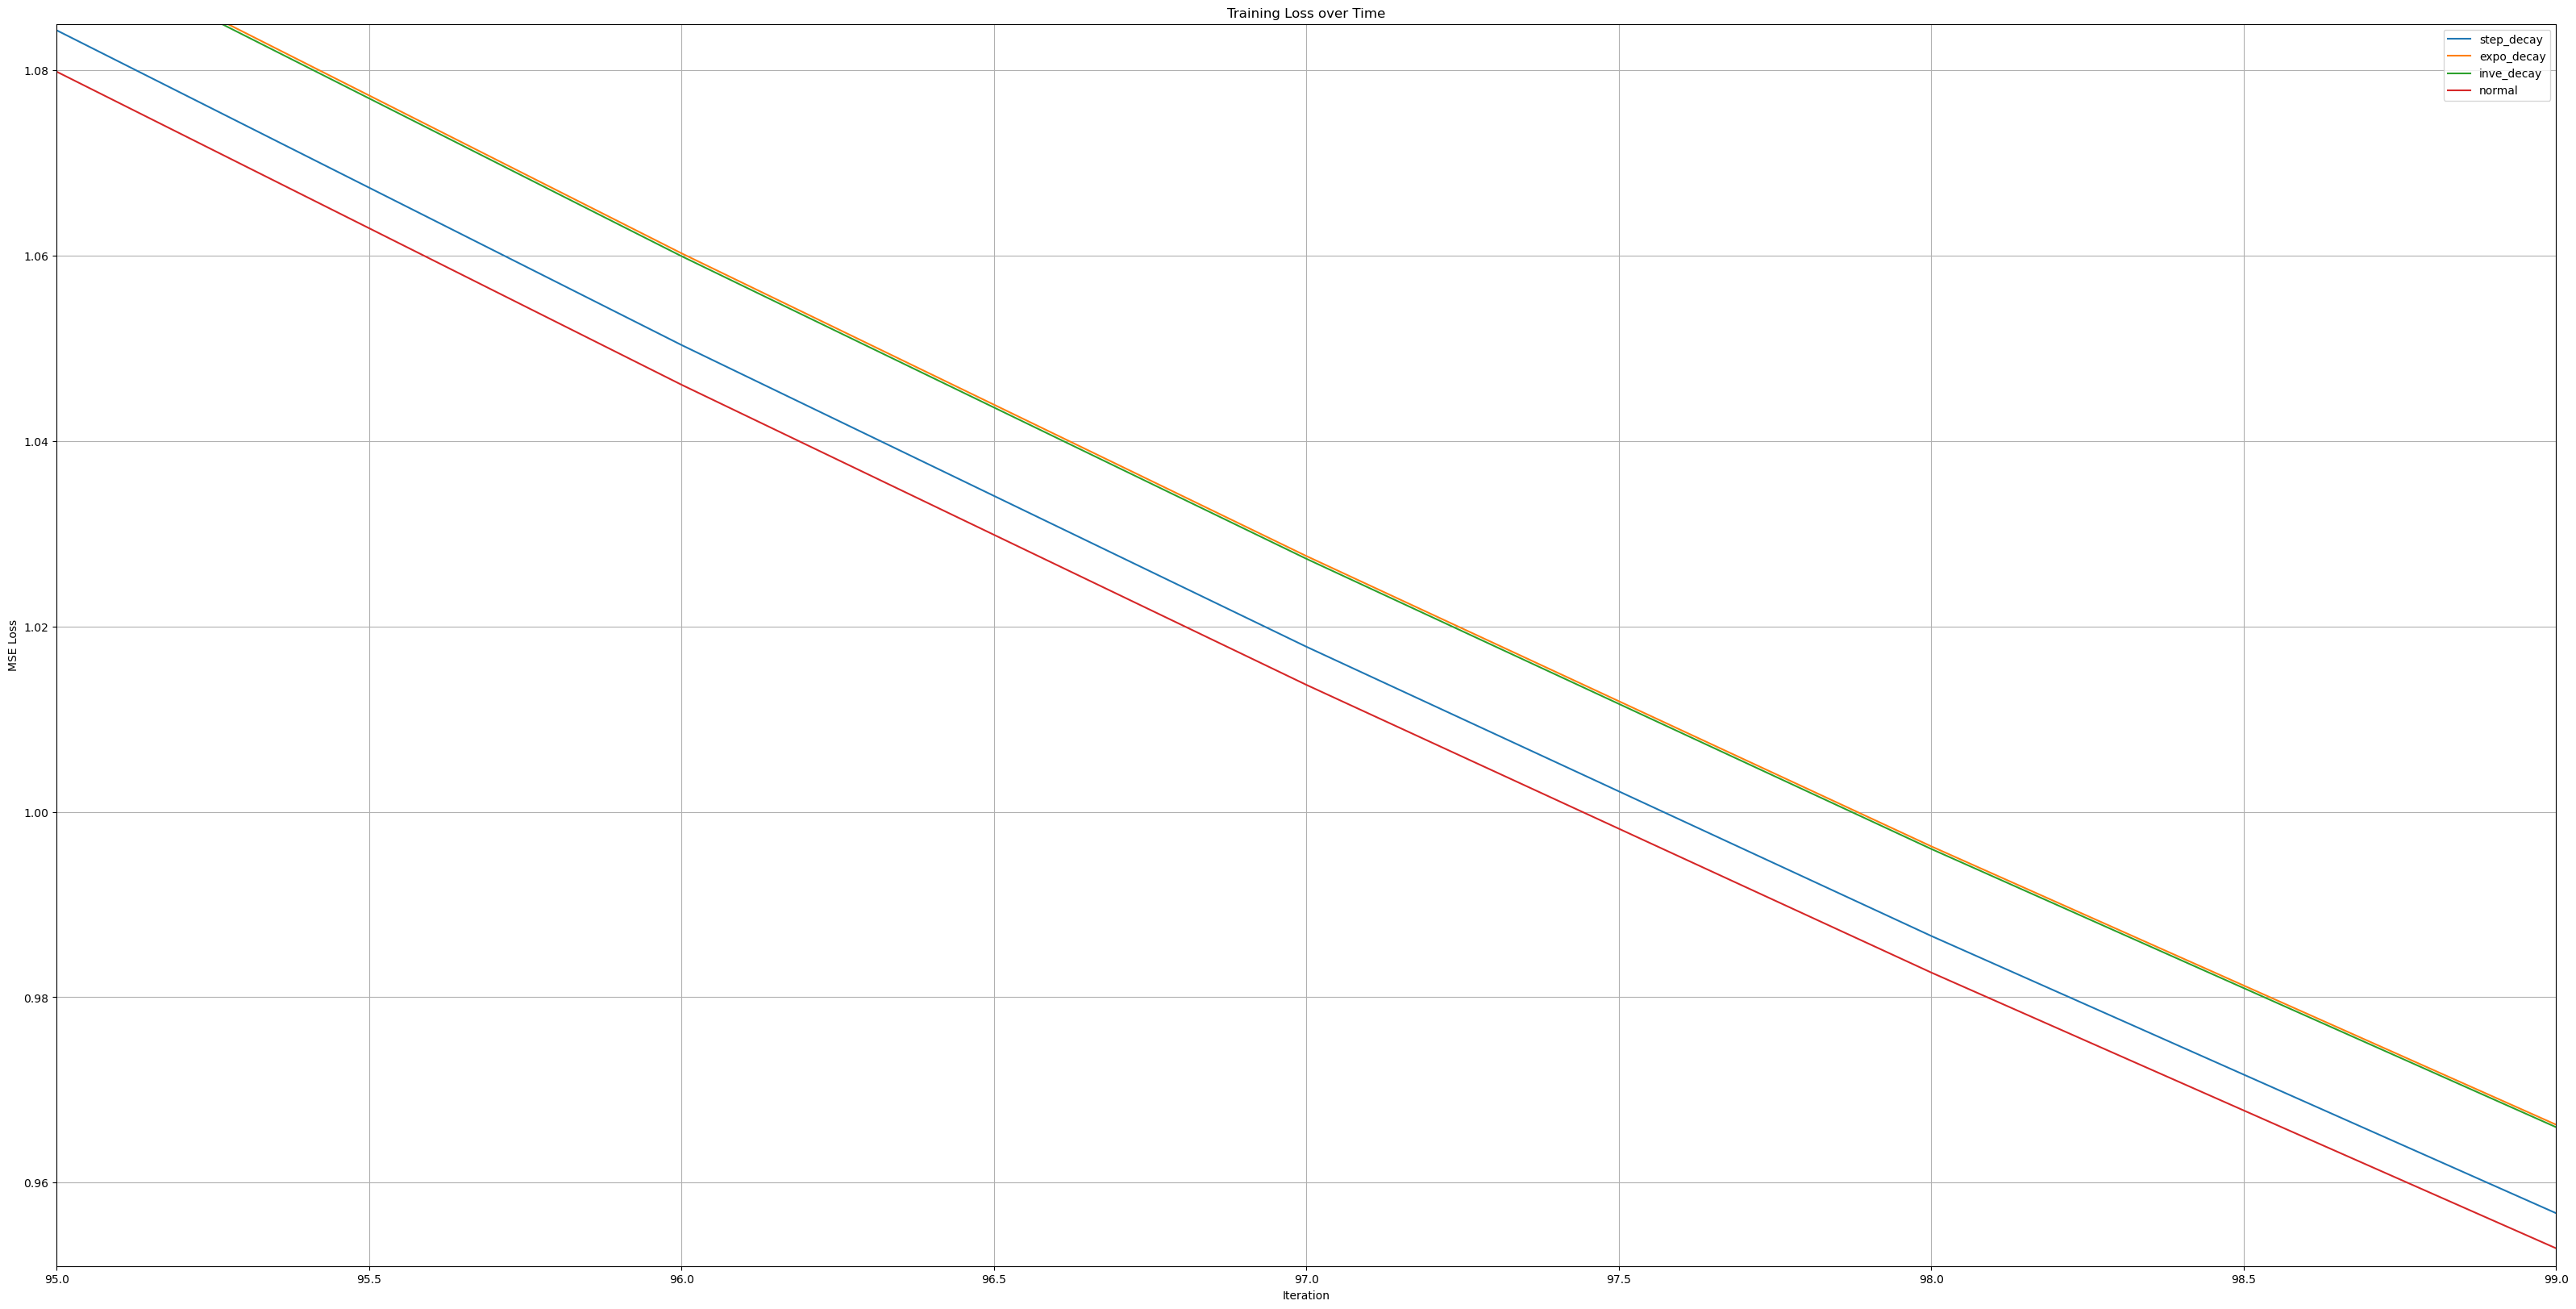

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plt.plot(loss_history_step_decay, label='step_decay')
plt.plot(loss_history_expo_decay, label='expo_decay')
plt.plot(loss_history_inve_decay, label='inve_decay')
plt.plot(loss_history_normal, label='normal')
plt.xlim(95,99)
plt.ylim(0.951, 1.085)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.legend()
plt.show()

## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [ ]:
def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    """
    Compute Ridge regression loss (MSE + L2 regularization).
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
    
    Returns:
        Ridge loss value
    """
    # Your code here
    mse_loss = compute_mse(y_true, y_pred)
    return mse_loss + (reg_lambda * np.sum(w ** 2))

def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    """
    Compute gradients for Ridge regression.
    
    Args:
        X: Feature matrix
        y: True target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
        """
    # Your code here
    return compute_gradients(X, y, y_pred)[0] + (2 * reg_lambda * w), compute_gradients(X, y, y_pred)[1]

def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,  # Regularization strength
    n_iterations: int = 1000
) -> tuple:
    """
    Train linear regression with L2 regularization.
    
    Hints:
    - Modify the loss calculation to include regularization term
    - Modify the gradient calculation for weights
    - Note: We typically don't regularize the bias term
    """
    # Your code here
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []

    for _ in range(n_iterations):
        y_pred = predict(X, w, b)
        gd_w, gd_b = calculate_ridge_gradients(X, y, y_pred, w, reg_lambda)

        w -= learning_rate * gd_w
        b -= learning_rate * gd_b
        loss_history.append(compute_mse(y, y_pred))

    y_pred = predict(X, w, b)
    loss_history.append(compute_mse(y, y_pred))

    return w, b, loss_history

In [30]:
w, b, loss_history_ridge =train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
plt.plot(loss_history_step_decay, label='step_decay')
plt.plot(loss_history_expo_decay, label='expo_decay')
plt.plot(loss_history_inve_decay, label='inve_decay')
plt.plot(loss_history_normal, label='normal')
plt.plot(loss_history_ridge, label='ridge')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.

Iteration    0 | Loss: 45.752853
Iteration    1 | Loss: 43.864218
Iteration    2 | Loss: 42.054061
Iteration    3 | Loss: 40.319117
Iteration    4 | Loss: 38.656260
Iteration    5 | Loss: 37.062492
Iteration    6 | Loss: 35.534939
Iteration    7 | Loss: 34.070850
Iteration    8 | Loss: 32.667586
Iteration    9 | Loss: 31.322617
Iteration   10 | Loss: 30.033520
Iteration   11 | Loss: 28.797972
Iteration   12 | Loss: 27.613747
Iteration   13 | Loss: 26.478712
Iteration   14 | Loss: 25.390822
Iteration   15 | Loss: 24.348117
Iteration   16 | Loss: 23.348718
Iteration   17 | Loss: 22.390827
Iteration   18 | Loss: 21.472717
Iteration   19 | Loss: 20.592735
Iteration   20 | Loss: 19.749296
Iteration   21 | Loss: 18.940882
Iteration   22 | Loss: 18.166036
Iteration   23 | Loss: 17.423365
Iteration   24 | Loss: 16.711531
Iteration   25 | Loss: 16.029252
Iteration   26 | Loss: 15.375300
Iteration   27 | Loss: 14.748499
Iteration   28 | Loss: 14.147719
Iteration   29 | Loss: 13.571880
Iteration 

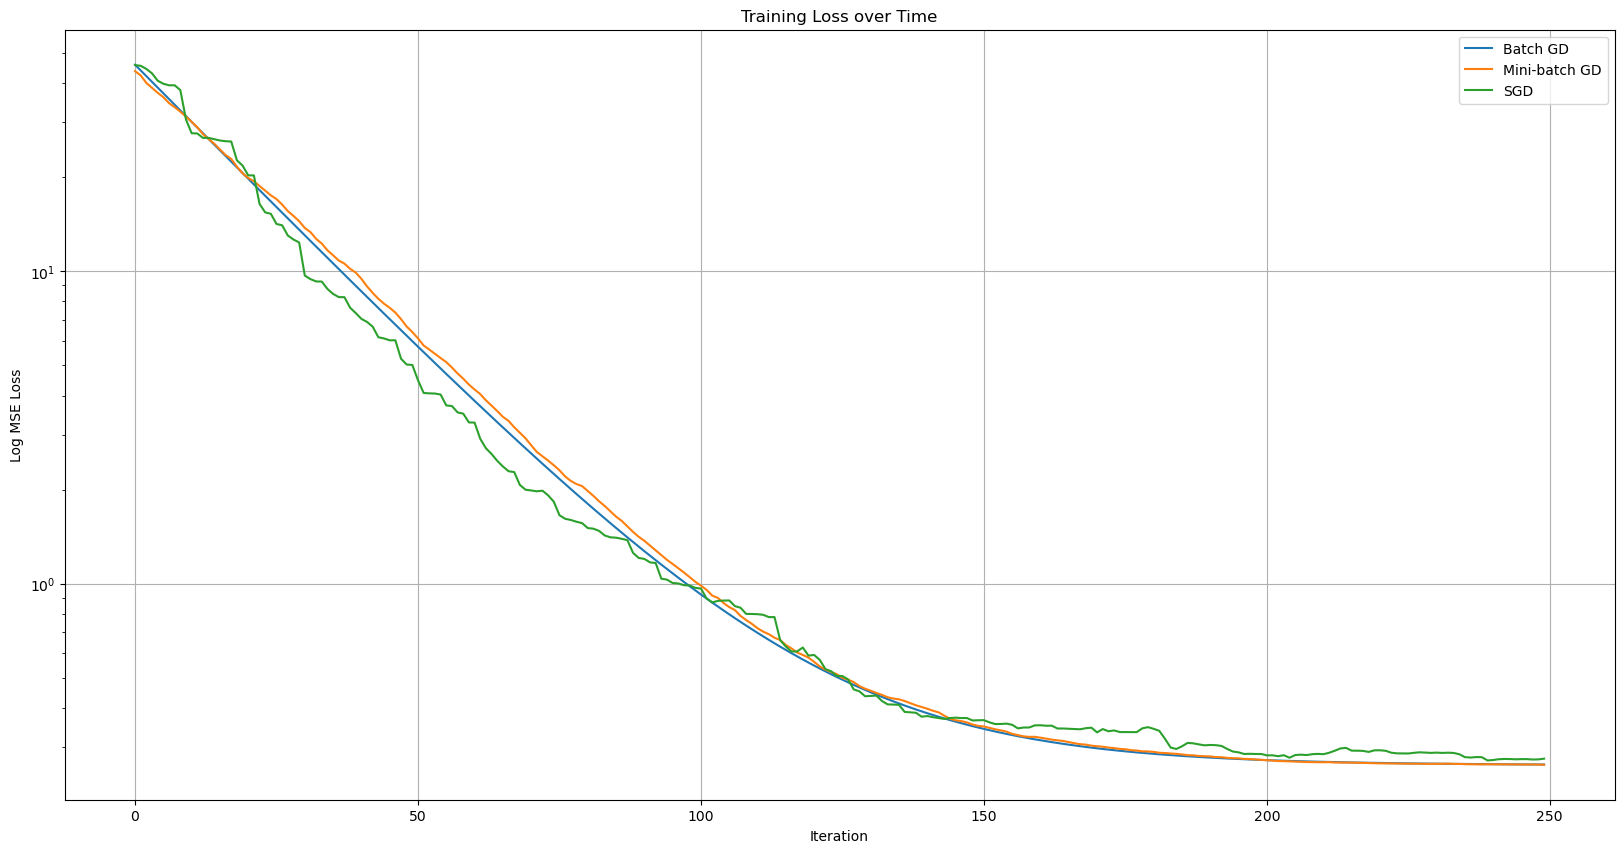

In [48]:
# Your code here
import matplotlib.pyplot as plt

iteration = 250
lr = 0.01

np.random.seed(0)
_,_,loss_batch_gd = train_linear_regression(X, y, lr, iteration, True, 1)
np.random.seed(0)
_,_,loss_batch_mini_batch_gd = train_minibatch_gd(X, y, 32, lr, iteration, True, 1)
np.random.seed(0)
_,_,loss_batch_sgd = train_minibatch_gd(X, y, 1, lr, iteration, True, 1)


plt.figure(figsize=(20, 10))
plt.plot(loss_batch_gd, label='Batch GD')
plt.plot(loss_batch_mini_batch_gd, label='Mini-batch GD')
plt.plot(loss_batch_sgd, label='SGD')
plt.xlabel('Iteration')
plt.ylabel('Log MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()